# 취업춘배

In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from selenium import webdriver
from selenium.webdriver import ActionChains
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.by import By
import time
import numpy as np

import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
import platform

#한글 폰트
if platform.system()== 'Windows' :
    plt.rc('font', family='NanumGothic')
else:
    plt.rc('font', family = 'AppleGothic')

In [3]:
driver = webdriver.Chrome('../../chromedriver.exe')
driver.get("https://job.alio.go.kr/orgcompare.do")
driver.maximize_window()
time.sleep(2) # 창이 켜지는 시간을 감안하여 2초 정도 대기

C:\Users\kdh\AppData\Local\Temp/ipykernel_28844/1490681411.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('../../chromedriver.exe')


In [4]:
dictionary = {"institution":[], "title":[], "region":[], "type":[], "start_date":[], "end_date":[], "new_sal":[], "avg_sal":[], "rate":[]}

def current_employment():

    classification = input("""
    직종을 선택해 주세요:
    1. 경영사무
    2. 서비스
    3. ICT
    4. 교육/연구 """)
    if classification == '경영사무':
        classification = '&detail_code=R600001&detail_code=R600002&detail_code=R600003'
    elif classification == '서비스':
        classification = '&detail_code=R600005&detail_code=R600006&detail_code=R600007&detail_code=R600008&detail_code=R600009&detail_code=R600010&detail_code=R600011&detail_code=R600012&detail_code=R600013'
    elif classification == 'ICT':
        classification = '&detail_code=R600019&detail_code=R600020'
    elif classification == '교육/연구':
        classification = '&detail_code=R600004&detail_code=R600025'
    elif classification == '산업':
        classification = '&detail_code=R600014&detail_code=R600015&detail_code=R600016&detail_code=R600017&detail_code=R600018&detail_code=R600021&detail_code=R600022&detail_code=R600023&detail_code=R600024'
    page = 1

    while True:

        url = 'https://job.alio.go.kr/recruit.do?pageNo={}&idx=&recruitYear=&recruitMonth={}&work_type=R1010&work_type=R1070&s_date=2021.12.08&e_date=2022.02.08&org_type=&org_name=&ing=2&title=&order=REG_DATE#'.format(page, classification)

        response = requests.get(url)
        response.raise_for_status()

        if response.status_code == 200:
            html = response.text
            soup = BeautifulSoup(html, 'html.parser')
            #print(response.status_code)
        else :
            print(response.status_code)

        tbody = soup.select_one('#frm > table > tbody')
        trs = tbody.select('tr')
        
        if len(tbody.text.strip()) == 0:
            #print('neu~')  # 내용 없는 페이지까지 출력 후 확인용
            break

        for tr in trs:
            tds = tr.select("td")
            dictionary["institution"].append(tds[3].text.replace('재단법인', '(재)').strip())
            dictionary["title"].append(tds[2].text.replace('\t', '').replace('\r', '').replace('\n', '').strip())
            dictionary["region"].append(tds[4].text.replace('\t', '').replace('\r', '').replace('\n', '').strip())
            dictionary["type"].append(tds[5].text.replace('\t', '').replace('\r', '').replace('\n', '').strip())
            dictionary["start_date"].append(tds[6].text)
            dictionary["end_date"].append(tds[7].text)

            # selenium
            keyword = tds[3].text.strip()
            driver.find_element(By.XPATH, '//*[@id="txt"]/div[1]/form/table/tbody/tr[3]/th/a[2]').click()
            driver.find_element(By.ID, "gi01").send_keys(keyword)
            driver.find_element(By.XPATH, '//*[@id="txt"]/div[1]/form/table/tbody/tr[3]/th/a[1]').click()
            driver.find_element(By.XPATH, '//*[@id="allCheck"]').click()
            driver.find_element(By.XPATH, '//*[@id="txt"]/div[2]/a[1]').click()
            driver.find_element(By.XPATH, '//*[@id="frm"]/div[2]/div[1]/ul/li[3]/a').click()
            print(tds[3].text.strip())
            try:
                new_sal = int(driver.find_element(By.XPATH, '//*[@id="list3_1"]/td[9]').text.replace(',',''))
                dictionary["new_sal"].append(new_sal)
                driver.implicitly_wait(1)
                driver.find_element(By.XPATH, '//*[@id="frm"]/div[2]/div[1]/ul/li[4]/a').click()
                avg_sal = int(driver.find_element(By.XPATH, '//*[@id="list4_1"]/td[9]').text.replace(',',''))
                dictionary["avg_sal"].append(avg_sal)
                print(new_sal, avg_sal)
            except:
                dictionary["new_sal"].append(None)
                dictionary["avg_sal"].append(None)
                print(new_sal, avg_sal)
            try:
                keyword = tds[3].text.replace('재단법인', '(재)').strip()
                url = 'https://www.jobplanet.co.kr/search?_rs_act=search_history&_rs_con=seach&category=search_new&query={}'.format(keyword)

                response = requests.get(url)

                response.raise_for_status()
                if response.status_code == 200:
                    html = response.text
                    soup = BeautifulSoup(html, 'html.parser')
                    #print(response.status_code)
                else :
                    print(response.status_code)

                result_card = soup.select_one('#mainContents > div:nth-child(1) > div > div.result_company_card > div.is_company_card > div:nth-child(1)')
                rate = result_card.select_one('#mainContents > div:nth-child(1) > div > div.result_company_card > div.is_company_card > div:nth-child(1) > span.rate_ty02')
                dictionary['rate'].append(float(rate.text.strip()))
                print(rate.text)
            except:
                dictionary['rate'].append(None)
        page += 1


In [5]:
current_employment()

한국교통연구원
41745 86650
3.3
한국보훈복지의료공단
39262 61964
3.0
주택관리공단(주)
24156 42618
2.4
한국과학영재학교
24156 42618
3.6
코레일네트웍스(주)
32728 46440
2.5
한국보훈복지의료공단
39262 61964
3.0
소상공인시장진흥공단
32460 49941
3.1
국방과학연구소
48222 98070
3.9
한국식품안전관리인증원
36918 52872
3.0
한국등산·트레킹지원센터
36088 49650
4.3
한국보건의료연구원
32537 57548
2.9
아동권리보장원
31086 44821
2.3
한국전기안전공사
38310 63109
2.8
대구경북과학기술원
52637 100769
3.4
한국특허정보원
36945 53908
2.8
한국고용노동교육원
34221 67015
한국산업기술평가관리원
41018 87136
3.9
한국중부발전(주)
42579 86279
4.3
한국서부발전(주)
45381 84890
4.1
한국중부발전(주)
42579 86279
4.3
한국해양수산연수원
27920 66329
2.9
재단법인 한국자활복지개발원
29567 51650
3.0
농업기술실용화재단
33258 63367
3.4
한국보훈복지의료공단
39262 61964
3.0
한국과학기술원
46238 112636
3.5
한국과학기술원
46238 112636
3.5
울산과학기술원
47115 117249
3.3


In [6]:
df = pd.DataFrame(dictionary)
df

,institution,title,region,type,start_date,end_date,new_sal,avg_sal,rate
0,한국교통연구원,한국교통연구원 2022년 직원 공개채용(1차) 공고,세종,정규직 외 1,2022.02.08,22.02.23,41745.0,86650.0,3.3
1,한국보훈복지의료공단,"[대구보훈병원] 2022년 정규직(임상병리사, 작업치료사, 시설(전기)기능직) 공개채용",대구,정규직,2022.02.08,22.02.17,39262.0,61964.0,3.0
2,주택관리공단(주),채용형 인턴 채용공고(주택관리공단 서울지사),서울 외 1,청년인턴(채용형),2022.02.08,22.02.15,24156.0,42618.0,2.4
3,한국과학영재학교,한국과학기술원 부설 한국과학영재학교 정규직 기술원 채용 공고,부산,정규직,2022.02.07,22.02.21,NaN,NaN,3.6
4,코레일네트웍스(주),코레일네트웍스(주) 2022년 상반기 수시채용,서울 외 2,정규직 외 2,2022.02.04,22.02.18,32728.0,46440.0,2.5
5,한국보훈복지의료공단,[대전보훈병원] 정규직 보건직(의료사회복지사)·기술직(전기)·기능직(행정) 공개채용,대전,정규직,2022.02.04,22.02.14,39262.0,61964.0,3.0
6,소상공인시장진흥공단,2022년 정규직(전산 경력) 채용,대전,정규직,2022.02.04,22.02.21,32460.0,49941.0,3.1
7,국방과학연구소,국방과학연구소 22년 상반기 임용 수시 공개채용,서울 외 5,정규직 외 2,2022.02.04,22.02.18,48222.0,98070.0,3.9
8,한국식품안전관리인증원,2022년도 IT/전산분야 채용 공고,충북,정규직,2022.02.04,22.02.14,36918.0,52872.0,3.0
9,한국등산·트레킹지원센터,2022년 한국등산·트레킹지원센터 정규직(5급) 채용 공고,서울 외 16,정규직,2022.02.04,22.02.18,36088.0,49650.0,4.3


In [7]:
dfrate = pd.concat([df['institution'], df['rate'], df['new_sal'],df['avg_sal']], axis=1)
dfrate.drop_duplicates(inplace=True)
dfrate.dropna(inplace=True)
dfrate_top5 = dfrate.sort_values(['rate'], ascending=False).head(10)
dfrate_top5

,institution,rate,new_sal,avg_sal
17,한국중부발전(주),4.3,42579.0,86279.0
9,한국등산·트레킹지원센터,4.3,36088.0,49650.0
18,한국서부발전(주),4.1,45381.0,84890.0
7,국방과학연구소,3.9,48222.0,98070.0
16,한국산업기술평가관리원,3.9,41018.0,87136.0
24,한국과학기술원,3.5,46238.0,112636.0
13,대구경북과학기술원,3.4,52637.0,100769.0
22,농업기술실용화재단,3.4,33258.0,63367.0
0,한국교통연구원,3.3,41745.0,86650.0
26,울산과학기술원,3.3,47115.0,117249.0


findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
C:\Users\kdh\miniconda3\envs\crawling\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 54620 (\N{HANGUL SYLLABLE HAN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kdh\miniconda3\envs\crawling\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 44397 (\N{HANGUL SYLLABLE GUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kdh\miniconda3\envs\crawling\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 51473 (\N{HANGUL SYLLABLE JUNG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kdh\miniconda3\envs\crawling\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 48512 (\N{HANGUL SYLLABLE BU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\kdh\miniconda3\envs\crawling\lib\site-packages\IPython\core\pylabtools.py:151: Us

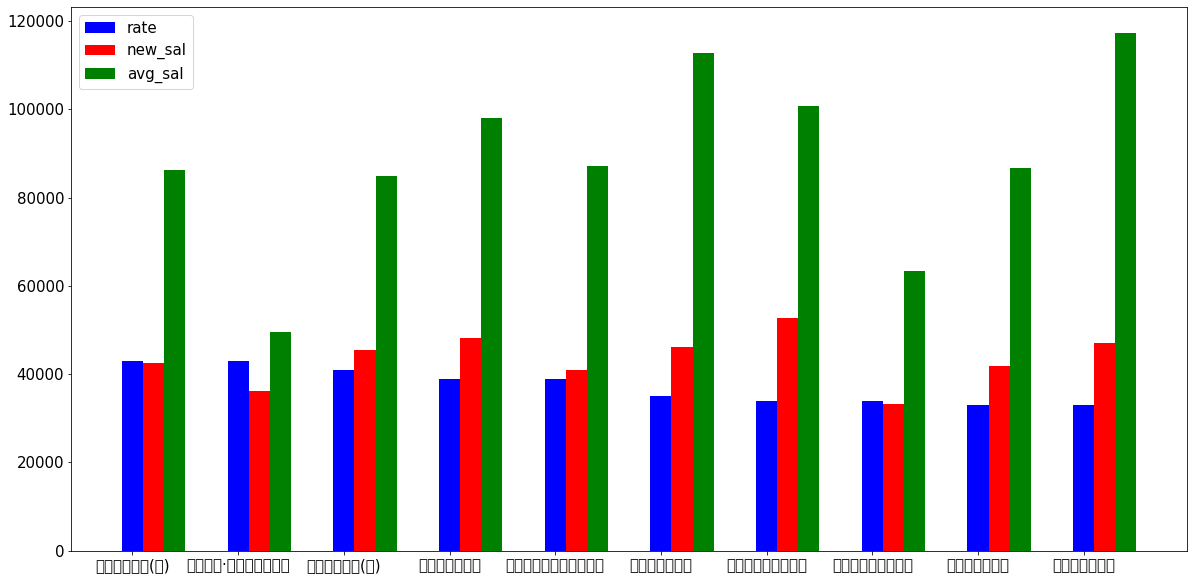

In [8]:
import matplotlib.pyplot as plt
plt.rc('font', size=15)
plt.figure(figsize=(20, 10))

x = np.arange(len(dfrate_top5['institution']))

plt.bar(x-0, dfrate_top5['rate']*10000, label='rate', color = 'b', width=0.2)
plt.bar(x+0.2, dfrate_top5['new_sal'], label='new_sal', color = 'r', width=0.2)
plt.bar(x+0.4, dfrate_top5['avg_sal'], label='avg_sal', color = 'g', width=0.2)
plt.xticks(x, dfrate_top5['institution'])
plt.legend()
plt.show()
plt.savefig('chart.png')

In [9]:
all_dictionary = {"institution":[], "title":[], "region":[], "type":[], "start_date":[], "end_date":[]}

def get_all_employment():

    classification = input("""
    직종을 선택해 주세요:
    1. 경영사무
    2. 서비스
    3. ICT
    4. 교육/연구 """)
    if classification == '경영사무':
        classification = '&detail_code=R600001&detail_code=R600002&detail_code=R600003'
    elif classification == '서비스':
        classification = '&detail_code=R600005&detail_code=R600006&detail_code=R600007&detail_code=R600008&detail_code=R600009&detail_code=R600010&detail_code=R600011&detail_code=R600012&detail_code=R600013'
    elif classification == 'ICT':
        classification = '&detail_code=R600019&detail_code=R600020'
    elif classification == '교육/연구':
        classification = '&detail_code=R600004&detail_code=R600025'
    elif classification == '산업':
        classification = '&detail_code=R600014&detail_code=R600015&detail_code=R600016&detail_code=R600017&detail_code=R600018&detail_code=R600021&detail_code=R600022&detail_code=R600023&detail_code=R600024'
    page = 1

    while True:

        url = 'https://job.alio.go.kr/recruit.do?pageNo={}&idx=&recruitYear=&recruitMonth={}&work_type=R1010&work_type=R1070&s_date=2016.01.01&e_date=2022.02.08&org_type=&org_name=&title=&order=REG_DATE#'.format(page, classification)

        response = requests.get(url)
        response.raise_for_status()

        if response.status_code == 200:
            html = response.text
            soup = BeautifulSoup(html, 'html.parser')
            #print(response.status_code)
        else :
            print(response.status_code)

        tbody = soup.select_one('#frm > table > tbody')
        trs = tbody.select('tr')
        
        if len(tbody.text.strip()) == 0:
            print('neu~')  # 내용 없는 페이지까지 출력 후 확인용
            break

        for tr in trs:
            tds = tr.select("td")
            all_dictionary["institution"].append(tds[3].text.replace('재단법인', '(재)').strip())
            all_dictionary["title"].append(tds[2].text.replace('\t', '').replace('\r', '').replace('\n', '').strip())
            all_dictionary["region"].append(tds[4].text.replace('\t', '').replace('\r', '').replace('\n', '').strip())
            all_dictionary["type"].append(tds[5].text.replace('\t', '').replace('\r', '').replace('\n', '').strip())
            all_dictionary["start_date"].append(tds[6].text)
            all_dictionary["end_date"].append(tds[7].text)

        page += 1


In [10]:
get_all_employment()

In [ ]:
df = pd.DataFrame(all_dictionary)
df

,institution,title,region,type,start_date,end_date
0,한국보훈복지의료공단,"[대구보훈병원] 2022년 정규직(임상병리사, 작업치료사, 시설(전기)기능직) 공개채용",대구,정규직,2022.02.08,22.02.17
1,주택관리공단(주),채용형 인턴 채용공고(주택관리공단 서울지사),서울 외 1,청년인턴(채용형),2022.02.08,22.02.15
2,한국과학영재학교,한국과학기술원 부설 한국과학영재학교 정규직 기술원 채용 공고,부산,정규직,2022.02.07,22.02.21
3,코레일네트웍스(주),코레일네트웍스(주) 2022년 상반기 수시채용,서울 외 2,정규직 외 2,2022.02.04,22.02.18
4,한국보훈복지의료공단,[대전보훈병원] 정규직 보건직(의료사회복지사)·기술직(전기)·기능직(행정) 공개채용,대전,정규직,2022.02.04,22.02.14
...,...,...,...,...,...,...
2728,한국로봇산업진흥원,2016년도 한국로봇산업진흥원 신규직원 채용 공고,대구,정규직,2016.01.29,16.02.12
2729,한전원자력연료주식회사,2016년 상반기 NCS기반 직원채용 공고,대전,정규직,2016.01.28,16.02.11
2730,국민연금공단,국민연금공단 응용 프로그래밍 전문가 공개 채용,전북,정규직,2016.01.22,16.01.29
2731,한국사학진흥재단,2016년 상반기 정규직 채용 공고,대구,정규직,2016.01.13,16.01.26


In [ ]:
df['start_date'] = pd.to_datetime(df['start_date'], yearfirst= True)
df['end_date'] = pd.to_datetime(df['end_date'], yearfirst= True)

In [ ]:
df

,institution,title,region,type,start_date,end_date
0,한국보훈복지의료공단,"[대구보훈병원] 2022년 정규직(임상병리사, 작업치료사, 시설(전기)기능직) 공개채용",대구,정규직,2022-02-08,2022-02-17
1,주택관리공단(주),채용형 인턴 채용공고(주택관리공단 서울지사),서울 외 1,청년인턴(채용형),2022-02-08,2022-02-15
2,한국과학영재학교,한국과학기술원 부설 한국과학영재학교 정규직 기술원 채용 공고,부산,정규직,2022-02-07,2022-02-21
3,코레일네트웍스(주),코레일네트웍스(주) 2022년 상반기 수시채용,서울 외 2,정규직 외 2,2022-02-04,2022-02-18
4,한국보훈복지의료공단,[대전보훈병원] 정규직 보건직(의료사회복지사)·기술직(전기)·기능직(행정) 공개채용,대전,정규직,2022-02-04,2022-02-14
...,...,...,...,...,...,...
2728,한국로봇산업진흥원,2016년도 한국로봇산업진흥원 신규직원 채용 공고,대구,정규직,2016-01-29,2016-02-12
2729,한전원자력연료주식회사,2016년 상반기 NCS기반 직원채용 공고,대전,정규직,2016-01-28,2016-02-11
2730,국민연금공단,국민연금공단 응용 프로그래밍 전문가 공개 채용,전북,정규직,2016-01-22,2016-01-29
2731,한국사학진흥재단,2016년 상반기 정규직 채용 공고,대구,정규직,2016-01-13,2016-01-26


In [ ]:
month = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
monthlist = []


for i in range(1, 13):
    monthlist.append(df[df['end_date'].dt.month==i]['institution'].count())

In [ ]:
monthlist

[195, 222, 207, 252, 268, 238, 202, 181, 226, 300, 257, 185]

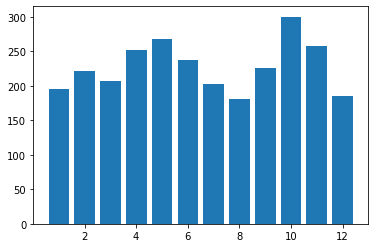

In [ ]:
import matplotlib.pyplot as plt

import pandas as pd



plt.bar(month, monthlist)

plt.show()

